In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from time import time
import SHFunctions as shf
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
np.set_printoptions(linewidth = 200)

In [2]:
A = shf.MakeSingularA(3, 2, delta = .00010)

[[0.25864408 0.47984146 0.26121452]
 [0.43240164 0.27674835 0.29055007]
 [0.40440802 0.42055705 0.174735  ]]


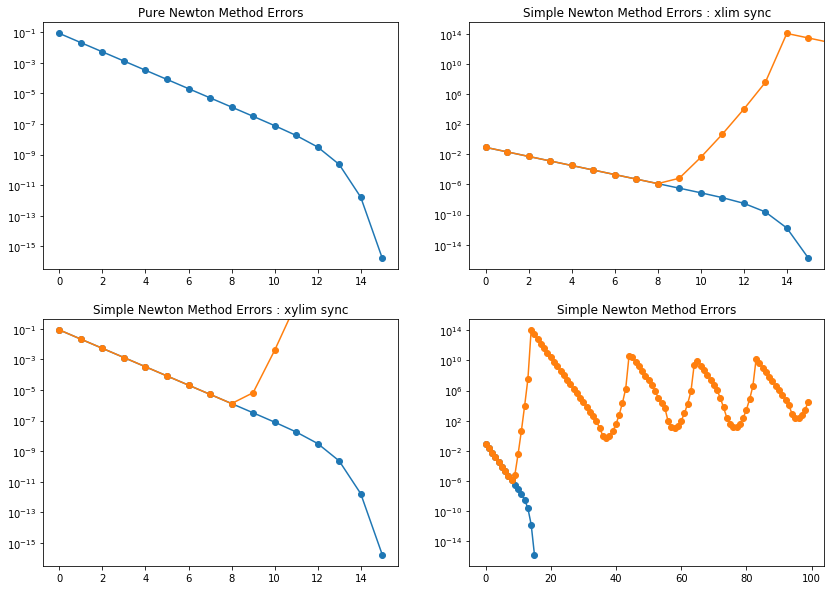

In [3]:
Ss = shf.NewtonPoly(A)
ss = shf.SimpNewtonPoly(A)
# Ss = shf.NewtonPoly(A, X0 = np.array([[0, 1, 0],[0, 0, 1],[0, 0, 0]]))
# Ss = shf.NewtonPoly(A, X0 = 10 * np.eye(3))
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.semilogy(Ss['errs'],'-o')
ax1.set_title('Pure Newton Method Errors')
ax2.semilogy(Ss['errs'],'-o')
ax2.semilogy(ss['errs'],'-o')
ax2.set_xlim(ax1.get_xlim())
ax2.set_title('Simple Newton Method Errors : xlim sync')
ax3.semilogy(Ss['errs'],'-o')
ax3.semilogy(ss['errs'],'-o')
ax3.set_xlim(ax1.get_xlim())
ax3.set_ylim(ax1.get_ylim())
ax3.set_title('Simple Newton Method Errors : xylim sync')
ax4.semilogy(Ss['errs'],'-o')
ax4.semilogy(ss['errs'],'-o')
ax4.set_title('Simple Newton Method Errors')
print(Ss['sol'])

In [4]:
# Derivative에 대한 eigenvalues와 vectors
Ds = []
EVs = []
for i in range(len(Ss['P_Xs'])):
    d, ev = nla.eig(Ss['P_Xs'][i])
    Ds.append(d)
    EVs.append(ev)

for i in range(len(Ds)):
    print(Ds[i])
    print(EVs[i])

[-0.6667     -1.21856782 -1.11473218 -0.6667     -1.21856782 -1.11473218 -0.6667     -1.21856782 -1.11473218]
[[-0.57735027 -0.7541835  -0.49679245  0.          0.          0.          0.          0.          0.        ]
 [-0.57735027  0.65090824 -0.09416585  0.          0.          0.          0.          0.          0.        ]
 [-0.57735027  0.08675081  0.86274565  0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.         -0.57735027 -0.7541835  -0.49679245  0.          0.          0.        ]
 [ 0.          0.          0.         -0.57735027  0.65090824 -0.09416585  0.          0.          0.        ]
 [ 0.          0.          0.         -0.57735027  0.08675081  0.86274565  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.         -0.57735027 -0.7541835  -0.49679245]
 [ 0.          0.          0.          0.          0.          0.         -0.57735027  0.65090824 -0.09416585]
 [

In [5]:
coeffi = np.zeros((Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1],len(EVs)))
coeffi = coeffi.astype(complex)
for i in range(len(EVs)):
    h = nla.solve(EVs[i], np.reshape(Ss['Hs'][i], (Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1],1), order='F'))
    coeffi[:,i] = np.squeeze(h)
# coeffi.transpose()

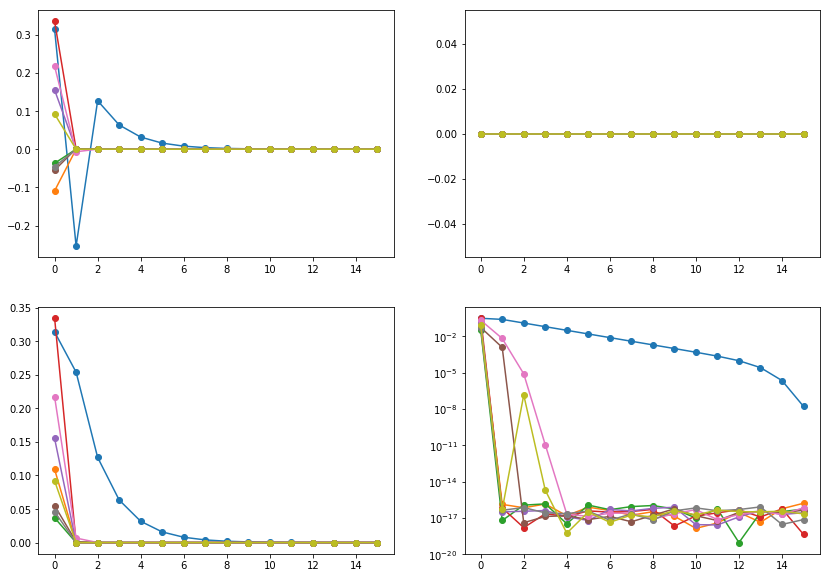

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
for i in range(coeffi.shape[0]):
    ax1.plot(np.real(coeffi[i,:]),'-o')
    ax2.plot(np.imag(coeffi[i,:]),'-o')
    ax3.plot(np.abs(coeffi[i,:]),'-o')
    ax4.semilogy(np.abs(coeffi[i,:]),'-o')

In [7]:
# X_{i}에 대한 eigenvalues와 vectors
Ds = []
EVs = []
for i in range(len(Ss['Xs'])):
    d, ev = nla.eig(Ss['Xs'][i])
    Ds.append(d)
    EVs.append(ev)

for i in range(len(Ds)):
    print(Ds[i])
    print(EVs[i])

[0. 0. 0.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[ 0.499925   -0.17936451 -0.10292354]
[[-0.57735027 -0.7541835  -0.49679245]
 [-0.57735027  0.65090824 -0.09416585]
 [-0.57735027  0.08675081  0.86274565]]
[ 0.74988749 -0.18552876 -0.10403644]
[[-0.57735027 -0.7541835  -0.49679245]
 [-0.57735027  0.65090824 -0.09416585]
 [-0.57735027  0.08675081  0.86274565]]
[ 0.87486872 -0.18553606 -0.10403657]
[[-0.57735027 -0.7541835  -0.49679245]
 [-0.57735027  0.65090824 -0.09416585]
 [-0.57735027  0.08675081  0.86274565]]
[ 0.93735928 -0.18553606 -0.10403657]
[[-0.57735027 -0.7541835  -0.49679245]
 [-0.57735027  0.65090824 -0.09416585]
 [-0.57735027  0.08675081  0.86274565]]
[ 0.96860448 -0.18553606 -0.10403657]
[[-0.57735027 -0.7541835  -0.49679245]
 [-0.57735027  0.65090824 -0.09416585]
 [-0.57735027  0.08675081  0.86274565]]
[ 0.98422689 -0.18553606 -0.10403657]
[[-0.57735027 -0.7541835  -0.49679245]
 [-0.57735027  0.65090824 -0.09416585]
 [-0.57735027  0.08675081  0.86274565]]
[ 0.99203774 -0.

In [8]:
for i in range(len(EVs)-1):
    Pre, Nex = EVs[i], EVs[i+1]
    for j in range(Pre.shape[1]):
        if np.sign(np.real(Pre[0,j])) != np.sign(np.real(Nex[0,j])):
            Nex[:,j] = -Nex[:,j]
    print(nla.norm(Pre - Nex, 'fro'))

2.8058166806497415
5.064917260848195e-16
9.782610026807863e-16
8.744107661286729e-16
9.44709445400566e-16
9.892244460905494e-16
5.66444991799657e-16
5.398084850998442e-16
9.058911354591131e-16
2.8154129132534975e-15
2.129415286191331e-15
3.788661488641875e-15
2.7266233277304013e-15
1.7514625932117389e-15
7.001065424966057e-16
1.5386830994832007e-15


In [9]:
B = np.zeros(A.shape)
B = B.astype(np.complex128)
for i in range(A.shape[0]):
    B[i,:,:] = np.dot(A[i,:,:], EVs[-1])
if np.sum(np.iscomplex(B)) == 0:
    B = B.astype(np.float64)
B

c:\users\saibi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


array([[[ 0.19243084, -0.16484024, -0.05699808],
        [ 0.19243084,  0.14226759, -0.01080385],
        [ 0.19243084,  0.01896094,  0.09898469]],

       [[-0.38491942, -0.91902375, -0.55379053],
        [-0.38491942,  0.79317584, -0.1049697 ],
        [-0.38491942,  0.10571175,  0.96173034]],

       [[ 0.19248858, -0.16476482, -0.0569484 ],
        [ 0.19248858,  0.1422025 , -0.01079444],
        [ 0.19248858,  0.01895226,  0.09889842]]])

In [10]:
BSs = shf.NewtonPoly(B)

In [11]:
d, v = nla.eig(BSs['sol'])
BSs['sol'][abs(BSs['sol']) < 1e-15] = 0
d[abs(d) < 1e-15] = 0
v[abs(v) < 1e-15] = 0
print(BSs['sol'])
print(d)
print(v)

[[ 0.99970006  0.          0.        ]
 [ 0.         -0.18553606  0.        ]
 [ 0.          0.         -0.10403657]]
[ 0.99970006 -0.18553606 -0.10403657]
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
